In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Analyzer

#### 샤프지수 
샤프지수 = (포트폴리오 예상 수익률 - 무위험률) / 수익률의 표준편차

In [2]:
mk = Analyzer.MarketDB()
stocks = ['삼성전자', 'SK하이닉스', '현대자동차', 'NAVER']
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, '2016-01-04', '2018-04-27')['close']

In [3]:
daily_ret = df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

In [4]:
port_ret = [] 
port_risk = [] 
port_weights = []
sharpe_ratio = [] 

In [5]:
for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    returns = np.dot(weights, annual_ret) 
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

In [6]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}

In [7]:
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
df = pd.DataFrame(portfolio) 
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

In [8]:
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]

In [9]:
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

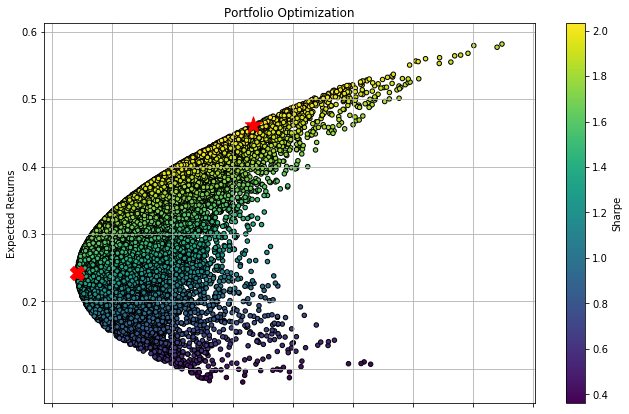

In [10]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
    edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r', 
    marker='*', s=300)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', 
    marker='X', s=200)
plt.title('Portfolio Optimization') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show()